<a href="https://colab.research.google.com/github/Pavitrakumar45/HearAttackPred/blob/main/HeartAttackPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# DATA MANIPULATION LIBRARY
import pandas as pd
import numpy as np

# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import Filter warning libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Libraries
import logging
logging.basicConfig(level = logging.INFO,
                   format = '%(asctime)s - %(levelname)s - %(message)s',
                   filemode = 'w',
                   filename = 'model.log',force = True)

# Import Sci-kit Learn
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [40]:
# Importind Dataset using pandas
url = 'https://raw.githubusercontent.com/chandanc5525/EnE_HearDiesease_ClassificationModel/refs/heads/main/data/raw/heart-disease.csv'
df = pd.read_csv(url)
df.sample(frac = 1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1


In [41]:
'''
There are no null values.
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
'''
sex - 1- male and 0 female

cp: chest pain type -- Value 0: typical angina -- Value 1: atypical angina -- Value 2: non-anginal pain -- Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

ca: number of major vessels (0-3) colored by flourosopy

slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
'''

In [42]:
from collections import OrderedDict

stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count' :df[i].count(),
        'Mean' :df[i].mean(),
        'Median' :df[i].median(),
        'Std'    :df[i].std(),
        'Skew'   :df[i].skew(),
        'Kurtosis':df[i].kurtosis(),
        'Variance':df[i].var(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feature,Count,Mean,Median,Std,Skew,Kurtosis,Variance,Q1,Q3,IQR
0,age,303,54.366337,55.0,9.082101,-0.202463,-0.542167,82.484558,47.5,61.0,13.5
1,sex,303,0.683168,1.0,0.466011,-0.791335,-1.382961,0.217166,0.0,1.0,1.0
2,cp,303,0.966997,1.0,1.032052,0.484732,-1.193071,1.065132,0.0,2.0,2.0
3,trestbps,303,131.623762,130.0,17.538143,0.713768,0.929054,307.586453,120.0,140.0,20.0
4,chol,303,246.264026,240.0,51.830751,1.143401,4.505423,2686.426748,211.0,274.5,63.5
5,fbs,303,0.148515,0.0,0.356198,1.986652,1.959678,0.126877,0.0,0.0,0.0
6,restecg,303,0.528053,1.0,0.525860,0.162522,-1.362673,0.276528,0.0,1.0,1.0
7,thalach,303,149.646865,153.0,22.905161,-0.537410,-0.061970,524.646406,133.5,166.0,32.5
8,exang,303,0.326733,0.0,0.469794,0.742532,-1.458317,0.220707,0.0,1.0,1.0
9,oldpeak,303,1.039604,0.8,1.161075,1.269720,1.575813,1.348095,0.0,1.6,1.6


In [43]:
'''
IQR OF FBS IS zero so it can be deleted.
'''

'\nIQR OF FBS IS zero so it can be deleted.\n'

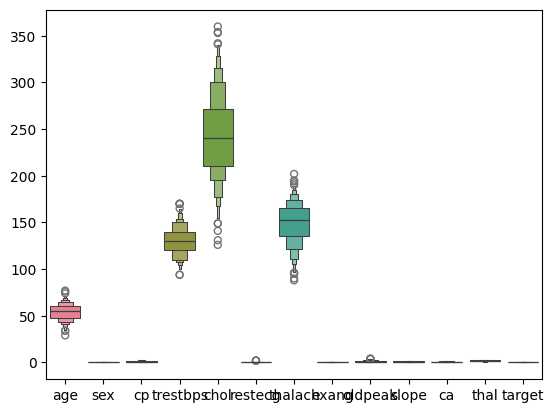

<Figure size 2000x2000 with 0 Axes>

In [68]:
# To check the outliers
sns.boxenplot(data = df)
plt.figure(figsize = (20,20))
plt.show()

In [45]:
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'age'.
No outliers found in 'sex'.
No outliers found in 'cp'.
Replaced 9 outliers in 'trestbps' with median.
Replaced 5 outliers in 'chol' with median.
Replaced 45 outliers in 'fbs' with median.
No outliers found in 'restecg'.
Replaced 1 outliers in 'thalach' with median.
No outliers found in 'exang'.
Replaced 5 outliers in 'oldpeak' with median.
No outliers found in 'slope'.
Replaced 25 outliers in 'ca' with median.
Replaced 2 outliers in 'thal' with median.
No outliers found in 'target'.


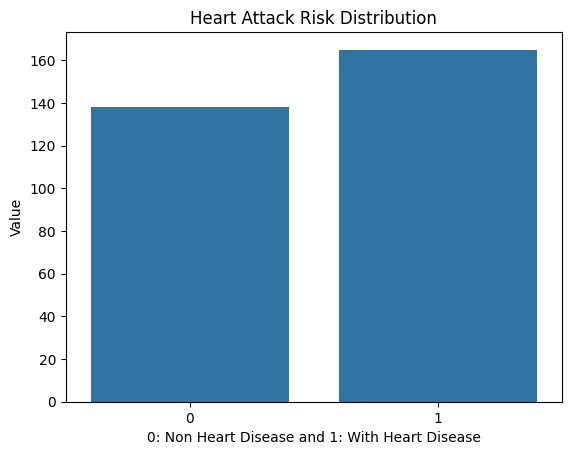

In [46]:
# Visualize class distribution
sns.countplot(data=df, x='target')
plt.title('Heart Attack Risk Distribution')
plt.xlabel('0: Non Heart Disease and 1: With Heart Disease')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

In [47]:
df['target'].value_counts()

,count
target,
1,165
0,138


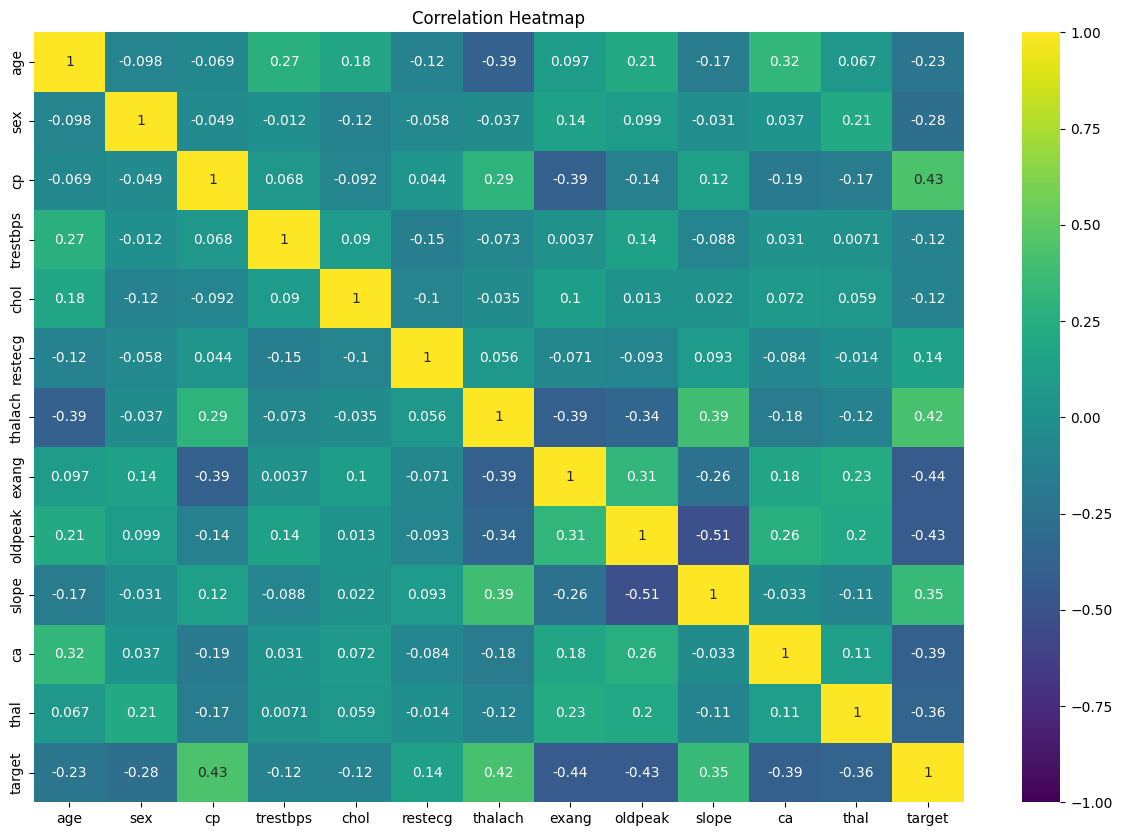

In [64]:
df= df.drop('fbs',axis = 1)
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',center=0,vmax=1,vmin=-1)
plt.title('Correlation Heatmap')

plt.show()

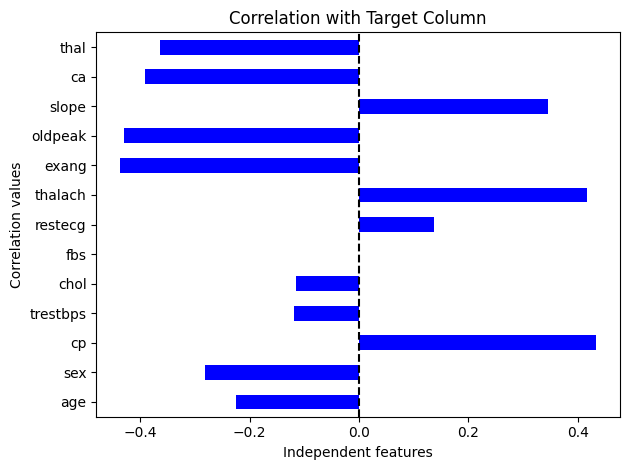

In [49]:
# pLoting correlation between independent column with the target column.
correlation = df.corr()['target'].drop('target')

correlation.plot(kind='barh', color='blue')
plt.axvline(0, linestyle='--', color='black')
plt.title('Correlation with Target Column')
plt.ylabel('Correlation values')
plt.xlabel('Independent features')
plt.tight_layout()
plt.show()


In [50]:
importance_features = correlation.sort_values(ascending=False)
print(importance_features)

cp          0.433798
thalach     0.417036
slope       0.345877
restecg     0.137230
chol       -0.115910
trestbps   -0.118564
age        -0.225439
sex        -0.280937
thal       -0.363322
ca         -0.391731
oldpeak    -0.430495
exang      -0.436757
fbs              NaN
Name: target, dtype: float64


In [51]:
_# Checking VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('target',axis = 1))

,features,VIF_Values
3,trestbps,68.30
7,thalach,44.00
0,age,42.55
4,chol,31.38
12,thal,18.32
10,slope,9.26
1,sex,3.42
9,oldpeak,2.95
2,cp,2.37
8,exang,2.07


In [65]:
#Preventing Data Leakage

X = df.drop(columns = ['target','thal','trestbps','thalach',],axis = 1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)



#  Using Scaling Technique
sc =  MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [66]:
# Importing  and Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
x_pca = pca.fit_transform(X_train)

print(f"Original shape: {X_train.shape}")
print(f"Transformed shape: {x_pca.shape}")

Original shape: (212, 9)
Transformed shape: (212, 4)


In [67]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=42).fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Classifier: ',accuracy_score(y_test,y_pred_RF))



The Model Accuracy for the Random Forest Classifier:  0.8681318681318682


In [55]:
import xgboost as xg

xgb = xg.XGBClassifier(random_state = 42).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Classifier: ',accuracy_score(y_test,y_pred_xgb)*100)

Model Accuracy for XGBoost Classifier:  82.41758241758241


In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42).fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print('Model Accuracy for AdaBoost Classifier: ',accuracy_score(y_test,y_pred_ada)*100)

Model Accuracy for AdaBoost Classifier:  82.41758241758241


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

print('Model Accuracy for Gradient Boosting Classifier:',accuracy_score(y_test,y_pred_gbr)*100)

Model Accuracy for Gradient Boosting Classifier: 79.12087912087912


In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print('Model Accuracy for Logistic Regression: ',accuracy_score(y_test,y_pred_lr)*100)



Model Accuracy for Logistic Regression:  80.21978021978022


In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print('Model Accuracy for KNN Classifier: ',accuracy_score(y_test,y_pred_knn)*100)

Model Accuracy for KNN Classifier:  82.41758241758241


In [60]:

from sklearn.svm import SVC

svm = SVC().fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

print('Model Accuracy for SVM Classifier: ',accuracy_score(y_test,y_pred_svm)*100)

Model Accuracy for SVM Classifier:  79.12087912087912


In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

print('Model Accuracy for Decision Tree Classifier: ',accuracy_score(y_test,y_pred_dt)*100)

Model Accuracy for Decision Tree Classifier:  72.52747252747253


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the model
RF = RandomForestClassifier(random_state=42, class_weight='balanced')

# Expanded Hyperparameter Grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto' which can give warnings
    'bootstrap': [True, False]
}


# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=60,  # Increased iterations for more search combinations
    scoring='accuracy',
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model and evaluation
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print('Best Parameters:', random_search.best_params_)
print('CV Accuracy:', random_search.best_score_ * 100)



Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
CV Accuracy: 81.56146179401992
